In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data2.csv', delimiter=';', decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


In [2]:
df = df.rename(columns={'Populatiion': 'Population'})
print(df.columns)

Index(['Country Name', 'Region', 'GDP per capita', 'Population',
       'CO2 emission', 'Area'],
      dtype='object')


In [3]:
for col in df.columns:
    if df[col].dtype == float:
        col_mean = df[col].mean()
        df[col] = df[col].fillna(col_mean)
        
print(df)

              Country Name                      Region  GDP per capita  \
0              Afghanistan                  South Asia      561.778746   
1                  Albania       Europe & Central Asia     4124.982390   
2                  Algeria  Middle East & North Africa     3916.881571   
3           American Samoa         East Asia & Pacific    11834.745230   
4                  Andorra       Europe & Central Asia    36988.622030   
..                     ...                         ...             ...   
212  Virgin Islands (U.S.)   Latin America & Caribbean    13374.833168   
213     West Bank and Gaza  Middle East & North Africa     2943.404534   
214            Yemen, Rep.  Middle East & North Africa      990.334774   
215                 Zambia          Sub-Saharan Africa     1269.573537   
216               Zimbabwe          Sub-Saharan Africa     1029.076649   

     Population   CO2 emission       Area  
0    34656032.0    9809.225000   652860.0  
1     2876101.0    5716

In [4]:
mask = (df.select_dtypes(include=[float]) < 0).any(axis=1)
result = df[mask]
print(result)

           Country Name                     Region  GDP per capita  \
56   Dominican Republic  Latin America & Caribbean    -6722.223536   
135             Myanmar        East Asia & Pacific     1195.515372   

     Population  CO2 emission      Area  
56   10648791.0     21539.958   48670.0  
135  52885223.0     21631.633 -676590.0  


In [5]:
for col in df.columns:
    if df[col].dtype == float:
        df[col] = df[col].abs()

print(df.loc[[56,135]])

           Country Name                     Region  GDP per capita  \
56   Dominican Republic  Latin America & Caribbean     6722.223536   
135             Myanmar        East Asia & Pacific     1195.515372   

     Population  CO2 emission      Area  
56   10648791.0     21539.958   48670.0  
135  52885223.0     21631.633  676590.0  


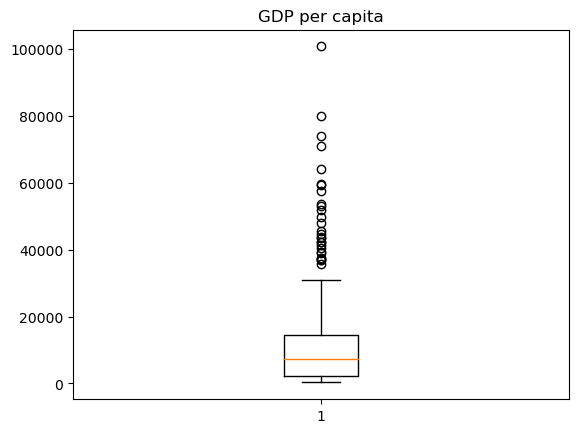

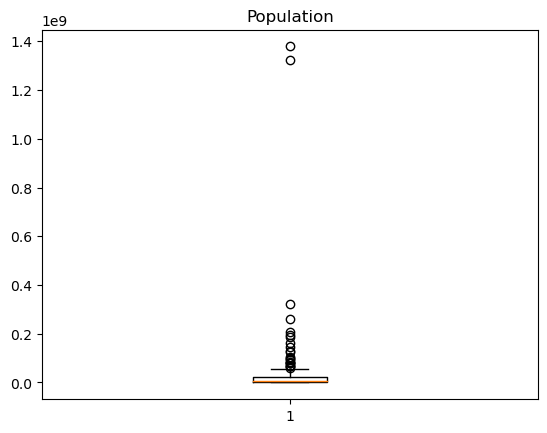

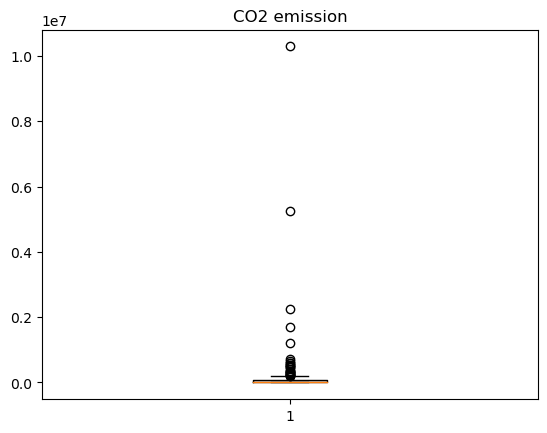

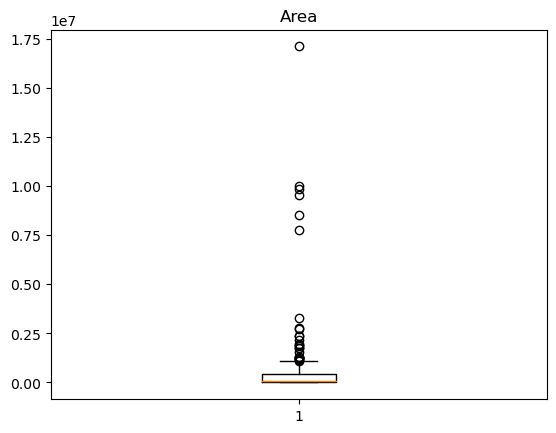

In [6]:
for col in df.columns:
    if df[col].dtype == float:
        plt.figure()
        plt.boxplot(df[col])
        plt.title(col)

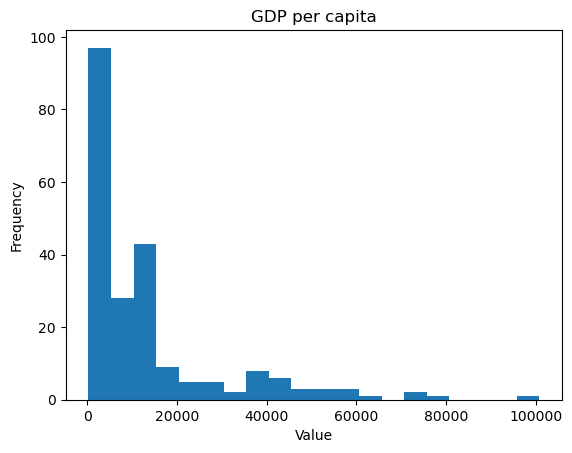

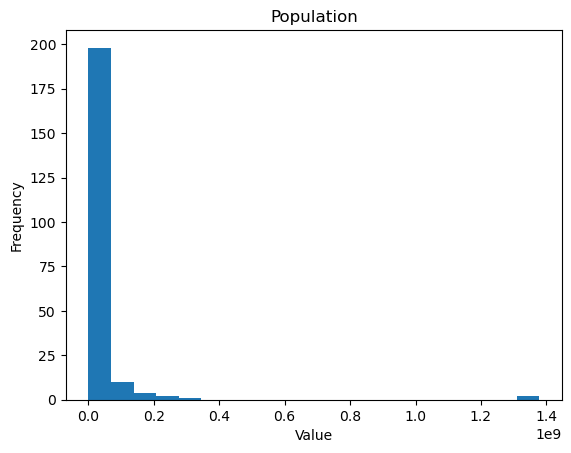

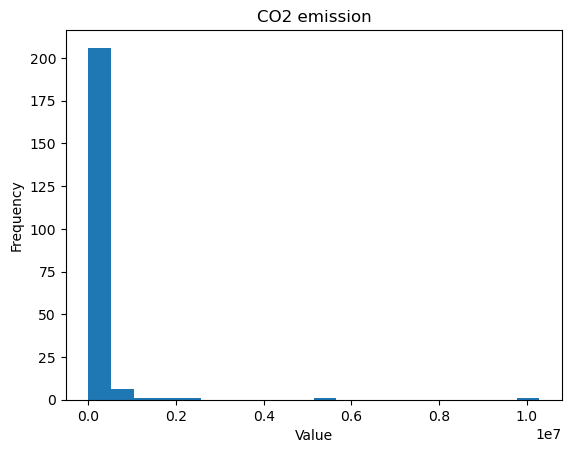

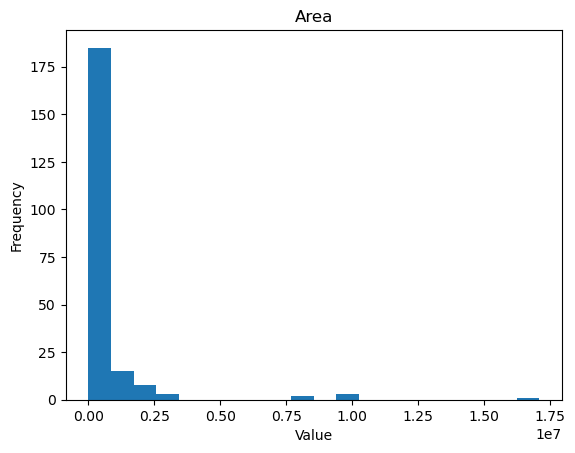

In [7]:
for column in df.columns:
    if df[column].dtype == float:
        plt.hist(df[column].dropna(), bins=20)
        plt.title(column)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

In [8]:
df["Population Density"] = df["Population"] / df["Area"]
df.head(1)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population Density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0,53.083405


In [9]:
max_gdp_index = df['GDP per capita'].idxmax()
max_gdp_country = df.loc[max_gdp_index, 'Country Name']
print(f"The country with the largest GDP per capita in the world is {max_gdp_country}.")

min_area_index = df['Area'].idxmin()
min_area_country = df.loc[min_area_index, 'Country Name']
print(f"The country with the smallest area is {min_area_country}.")

The country with the largest GDP per capita in the world is Luxembourg.
The country with the smallest area is Monaco.


In [10]:
region_mean_area = df.groupby('Region')['Area'].mean()
largest_region = region_mean_area.idxmax()
print("The region with the largest average area is", largest_region)

The region with the largest average area is North America


In [11]:
df_sorted = df.sort_values(by='Population Density', ascending=False)
print('Country with highest population density is', df_sorted.iloc[0]['Country Name'])

df_eu_ca = df[df['Region'] == 'Europe & Central Asia']
df_eu_ca_sorted = df_eu_ca.sort_values(by='Population Density', ascending=False)
print('Country with highest population density in Europe and Central Asia is', df_eu_ca_sorted.iloc[0]['Country Name'])

Country with highest population density is Macao SAR, China
Country with highest population density in Europe and Central Asia is Monaco


In [12]:
df["Total GDP"] = df["GDP per capita"] * df["Population"]
df.head(1)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population Density,Total GDP
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0,53.083405,1.946902e+10


In [13]:
region_stats = df.groupby('Region')['Total GDP'].agg(['mean', 'median'])

for region in region_stats.index:
    mean = region_stats.loc[region, 'mean']
    median = region_stats.loc[region, 'median']
    if mean == median:
        print(f"The mean and median GDP in {region} are equal ({mean}).")
    else:
        print(f"The mean and median GDP in {region} are different (mean = {mean}, median = {median}).")

The mean and median GDP in East Asia & Pacific are different (mean = 601314797021.4976, median = 11400653732.56196).
The mean and median GDP in Europe & Central Asia are different (mean = 349091144622.72107, median = 49052249268.26028).
The mean and median GDP in Latin America & Caribbean are different (mean = 128573963145.39444, median = 13643876718.90971).
The mean and median GDP in Middle East & North Africa are different (mean = 161162758088.2565, median = 102047824411.42694).
The mean and median GDP in North America are different (mean = 6718676588591.594, median = 1530680973899.0176).
The mean and median GDP in South Asia are different (mean = 361745128122.7743, median = 52017740706.313446).
The mean and median GDP in Sub-Saharan Africa are different (mean = 49945863170.15772, median = 10981369640.35254).


In [14]:
df['CO2 emission per capita'] = df['CO2 emission'] / df['Population']
df.head(1)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population Density,Total GDP,CO2 emission per capita
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0,53.083405,1.946902e+10,0.000283


In [15]:
df_sorted = df.sort_values(['GDP per capita'], ascending=False)
print('Top 5 countries by GDP per capita:\n', df_sorted.head()[['Country Name', 'GDP per capita']],
     '\nThe last 5 countries by GDP per capita:\n', df_sorted.tail()[['Country Name', 'GDP per capita']])

Top 5 countries by GDP per capita:
          Country Name  GDP per capita
115        Luxembourg    100738.68420
188       Switzerland     79887.51824
116  Macao SAR, China     74017.18471
146            Norway     70868.12250
92            Ireland     64175.43824 
The last 5 countries by GDP per capita:
                  Country Name  GDP per capita
118                Madagascar      401.742270
37   Central African Republic      382.213174
134                Mozambique      382.069330
119                    Malawi      300.307665
31                    Burundi      285.727442


In [16]:
df_sorted = df.sort_values(['CO2 emission per capita'], ascending=False)
print('Top 5 countries by СО2 emission per capita:\n', df_sorted.head()[['Country Name', 'CO2 emission per capita']],
     '\nThe last 5 countries by СО2 emission per capita:\n', df_sorted.tail()[['Country Name', 'CO2 emission per capita']])

Top 5 countries by СО2 emission per capita:
                  Country Name  CO2 emission per capita
182  St. Martin (French part)                 5.168053
163                San Marino                 4.972867
130                    Monaco                 4.288790
145  Northern Mariana Islands                 3.000820
3              American Samoa                 2.969732 
The last 5 countries by СО2 emission per capita:
          Country Name  CO2 emission per capita
44   Congo, Dem. Rep.                 0.000059
38               Chad                 0.000050
175           Somalia                 0.000043
31            Burundi                 0.000042
61            Eritrea                 0.000020
